In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE= 256
BATCH_SIZE=32
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\KAPISH\PycharmProjects\tf_tut\PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

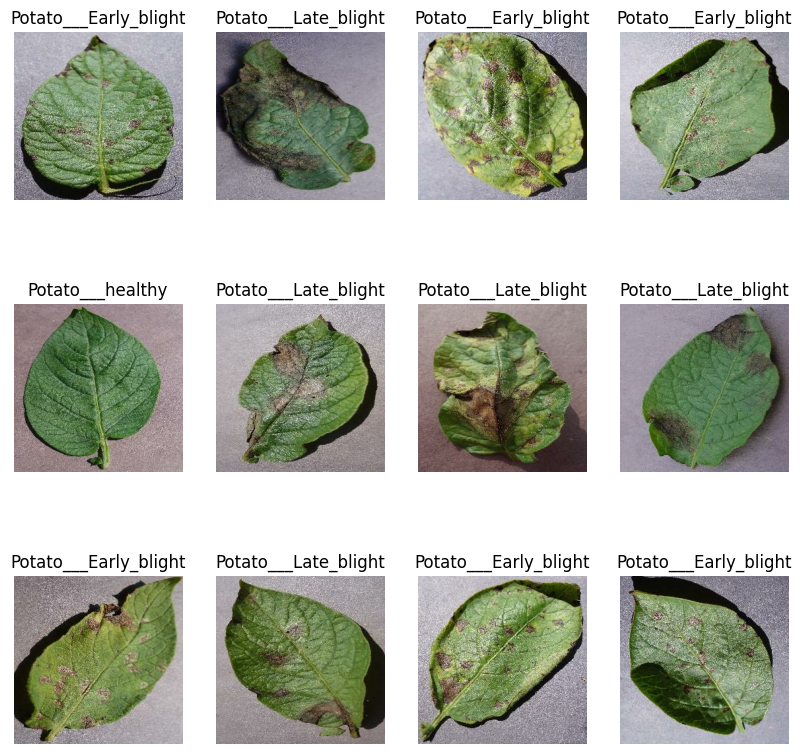

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
        # print(image_batch[0].numpy())
        # print(label_batch.numpy())

In [7]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_dataset= dataset.take(54)

In [9]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [12]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [13]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds,test_ds


In [14]:
train_ds ,val_ds,test_ds = get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(test_ds)

8

In [17]:
len(val_ds)

6

In [18]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [20]:
augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [21]:
n_classes=3

model = tf.keras.Sequential([
    resize_and_rescale,
    augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3))

C:\Users\KAPISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
for images, labels in dataset.take(1):
    print("Batch shape:", images.shape)
    print("Label shape:", labels.shape)


Batch shape: (32, 256, 256, 3)
Label shape: (32,)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 948ms/step - accuracy: 0.4500 - loss: 0.9441 - val_accuracy: 0.6146 - val_loss: 0.8872
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 897ms/step - accuracy: 0.6227 - loss: 0.8437 - val_accuracy: 0.7083 - val_loss: 0.7097
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 896ms/step - accuracy: 0.7773 - loss: 0.5522 - val_accuracy: 0.8385 - val_loss: 0.4321
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 922ms/step - accuracy: 0.8447 - loss: 0.3616 - val_accuracy: 0.8594 - val_loss: 0.3125
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 919ms/step - accuracy: 0.8854 - loss: 0.2870 - val_accuracy: 0.8906 - val_loss: 0.2509
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 835ms/step - accuracy: 0.8844 - loss: 0.3116 - val_accuracy: 0.9323 - val_loss: 0.2015
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 808ms/step - accuracy: 0.9178 - loss: 0.2150 - val_accuracy: 0.9271 - val_loss: 0.2042
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 87s 908ms/step - accuracy: 0.9307 - loss: 0.1986 - val_accu

In [26]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.9927 - loss: 0.0172


In [27]:
scores

[0.017191177234053612, 0.9921875]

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history['accuracy']

[0.48321759700775146,
 0.6537558436393738,
 0.7928403615951538,
 0.8638497591018677,
 0.8796948194503784,
 0.8984741568565369,
 0.9119718074798584,
 0.9319248795509338,
 0.9196009635925293,
 0.9325117468833923,
 0.9489436745643616,
 0.9207746386528015,
 0.9495305418968201,
 0.9507042169570923,
 0.9571596384048462,
 0.9542253613471985,
 0.9512910842895508,
 0.9542253613471985,
 0.9647887349128723,
 0.9722222089767456,
 0.9791666865348816,
 0.9681712985038757,
 0.9771126508712769,
 0.9741784334182739,
 0.9699074029922485,
 0.9658564925193787,
 0.9618544578552246,
 0.9548611044883728,
 0.9646990895271301,
 0.9803240895271301,
 0.9907407164573669,
 0.9847418069839478,
 0.9823943376541138,
 0.9751157164573669,
 0.9911971688270569,
 0.9900234937667847,
 0.9882628917694092,
 0.9847418069839478,
 0.9612675905227661,
 0.9894366264343262,
 0.9829812049865723,
 0.9906103014945984,
 0.9855324029922485,
 0.9890046119689941,
 0.9929577708244324,
 0.9849537014961243,
 0.9888497591018677,
 0.992957770

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

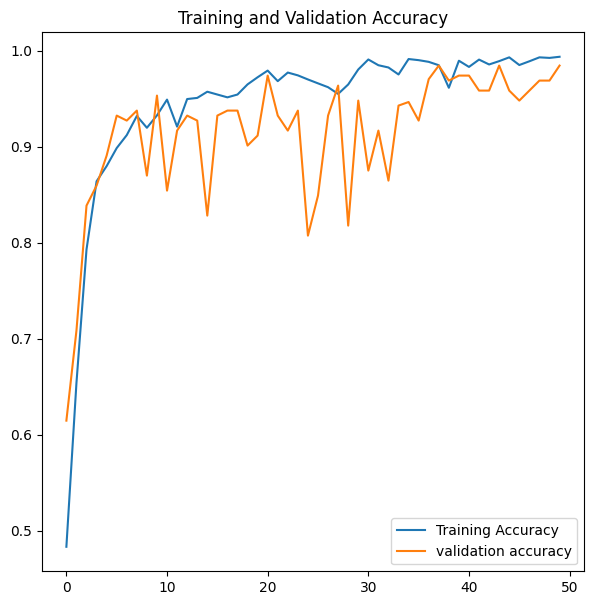

In [44]:
plt.figure(figsize=(7,7))
plt.plot(range(50),acc,label='Training Accuracy')
plt.plot(range(50),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


first image to predict
first image's actual label Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
Potato___Late_blight


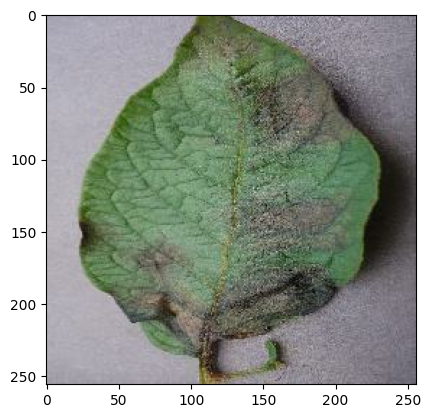

In [60]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label  = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [89]:
from tensorflow.keras.preprocessing.image import img_to_array

def predict(model,image):
    img_array = img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


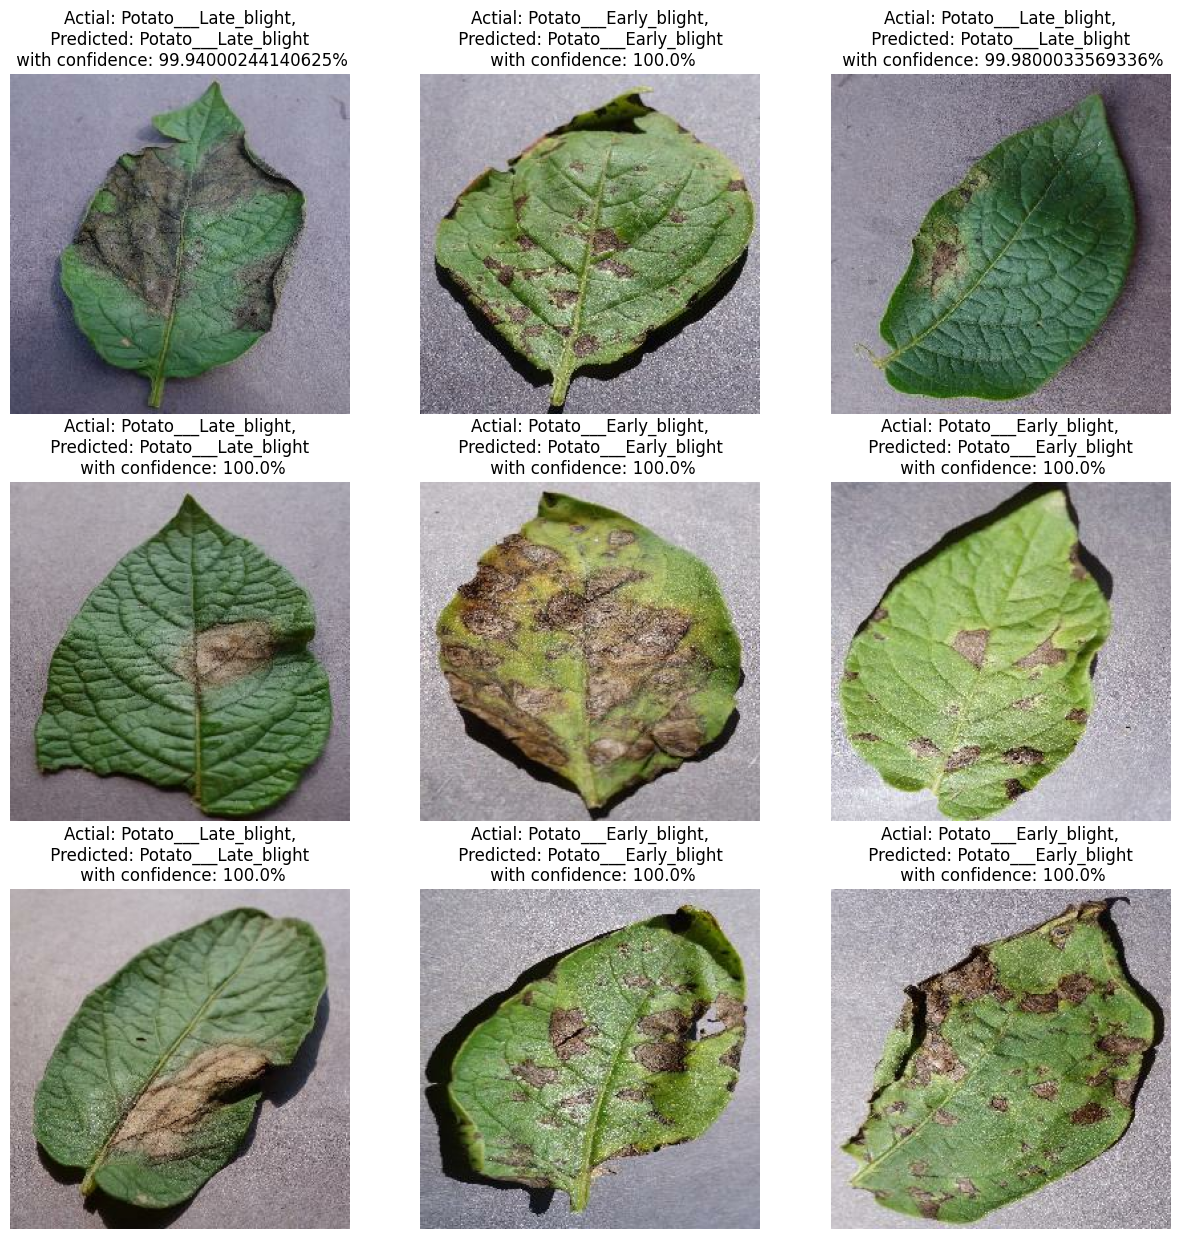

In [91]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i])
        actual_class = class_names[labels[i]]
        plt.title(f'Actial: {actual_class},\n Predicted: {predicted_class} \n with confidence: {confidence}%')
        plt.axis('off')

In [ ]:
import os
model_version = max(int(i) for i in os.listdir("../models"))+1

: 

In [ ]:
model_version =1
model.save(f"C:/Users/KAPISH/PycharmProjects/tf_tut/models/{model_version}.h5")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("C:/Users/KAPISH/PycharmProjects/tf_tut/models/1.keras")

# Save it in TensorFlow SavedModel format inside folder "1"
model.export("C:/Users/KAPISH/PycharmProjects/tf_tut/models/1")


TypeError: this __dict__ descriptor does not support '_DictWrapper' objects